In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn import model_selection
from sklearn import preprocessing 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_red = pd.read_csv('./data/train_red.csv', index_col = 0)

In [3]:
#train_red.head()

### Dividing the train set into train and test

In [3]:
X = train_red.iloc[:, 0:-1]
Y = np.log(train_red.iloc[:, -1])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state = 0)

### Linear Regression

In [4]:
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [5]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
RMSE_train = np.sqrt(np.sum(np.square((y_train) - (y_pred_train)))/y_train.size)
RMSE_test = np.sqrt(np.sum(np.square((y_test) - (y_pred_test)))/y_test.size)
print('RMSE.log.diff(train):', round(RMSE_train, 3))
print('RMSE.log.diff(test):', round(RMSE_test, 3))

RMSE.log.diff(train): 0.143
RMSE.log.diff(test): 0.169


##### Testing for Linear Regression Assumptions

1) Linear relationship between the outcome variable and the independent variables     
    
    
Was already checked and only variables with correlation > 0.4 were selected

In [14]:
sorted(train_red.corr(method = 'pearson')['SalePrice'], reverse = True)

[1.0,
 0.7909816005838047,
 0.7110602142607619,
 0.7086244776126511,
 0.6826392416562591,
 0.6595997207286572,
 0.640409197258349,
 0.6234314389183598,
 0.6135805515591944,
 0.6058521846919166,
 0.5852071991725148,
 0.5606637627484452,
 0.5492467563332154,
 0.5337231555820238,
 0.5228973328794967,
 0.5204376059504007,
 0.5071009671113867,
 0.4982592492489897,
 0.48398308937409223,
 0.4742790154670124,
 0.4672900227645366,
 0.4669288367515242,
 0.4276487073988049,
 0.4267028158998941,
 0.3927061739064809,
 0.3702197837470752,
 0.3655018460448823,
 0.31803383833342147]

2) Multivariate Normality (Distribution of Residuals)

Text(0.5, 0, 'Difference of Actual log(SalePrice) and Predicted log(SalePrice)')

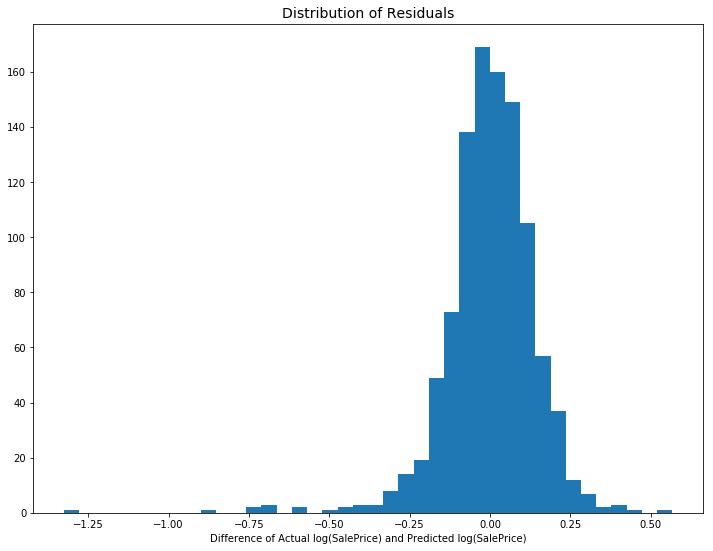

In [83]:
plt.figure(figsize=(12,9))
plt.hist(y_train - y_pred_train, bins = 40) 
plt.title('Distribution of Residuals', fontsize = 14)
plt.xlabel('Difference of Actual log(SalePrice) and Predicted log(SalePrice)')

Except for a few points to left there is no major violation of normality of residuals.

3) Constant Variation and Auto-correlation

Text(0, 0.5, 'Difference of Actual log(SalePrice) and Predicted log(SalePrice)')

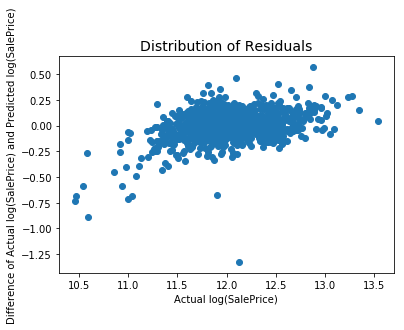

In [85]:
plt.scatter(y_train, y_train - y_pred_train)
plt.title('Distribution of Residuals', fontsize = 14)
plt.xlabel('Actual log(SalePrice)')
plt.ylabel('Difference of Actual log(SalePrice) and Predicted log(SalePrice)')

The variance does not seems to be changing with ya values, but there seems to be an issue of auto-correlation as residuals are going up with log(SalePrice).

4) Multicollinearity (Checking One-Feature-vs-Rest)

In [66]:
train_red.columns[0:-1]

Index(['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'OverallQual', 'ExterQual', 'BsmtQual',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'MSSubClass',
       'MSZoning', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'GarageType'],
      dtype='object')

In [72]:
#for feature_name in train_red.columns[0:-1]:
#    print(train_red[feature_name])

In [73]:
from sklearn.metrics import r2_score
numeric_features = ['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
                    'GarageYrBlt', 'GarageCars', 'GarageArea']
scores = {}
ols2 = linear_model.LinearRegression()
for feature_name in train_red.columns[0:-1]:
                df2 = train_red.copy()
                feature = df2[feature_name].copy()
                df2.drop(feature_name, axis=1, inplace=True)
                ols2.fit(df2, feature)
                scores[feature_name] = ols2.score(df2, feature)
scores = pd.DataFrame(scores, index = ['ovr_R2']).T
scores = scores.sort_values(by = 'ovr_R2', ascending = False)
scores

,ovr_R2
Exterior2nd,0.889207
Exterior1st,0.888770
GrLivArea,0.839374
GarageCars,0.821805
GarageArea,0.812096
TotalBsmtSF,0.809708
YearBuilt,0.806185
1stFlrSF,0.795206
FireplaceQu,0.783035
Fireplaces,0.773501


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

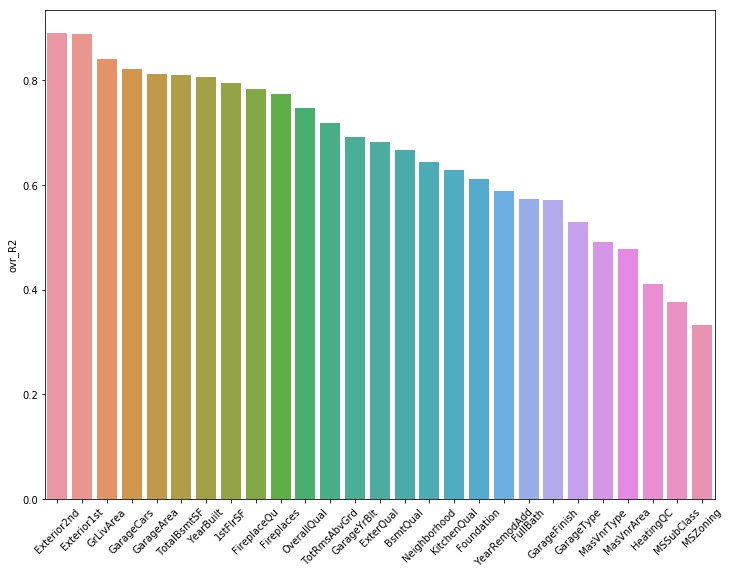

In [76]:
plt.figure(figsize=(12,9))
sns.barplot(scores.index, y = 'ovr_R2', data = scores)
plt.xticks(rotation = 45)

In [75]:
scores[scores.ovr_R2 > 0.8].index

Index(['Exterior2nd', 'Exterior1st', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'YearBuilt'],
      dtype='object')

one feature vs rest is showing issue with multicollinearity

#### Linear Regression after addressing Multicollinearity

In [77]:
train_red1 = train_red.drop(['Exterior2nd', 'GrLivArea', 'GarageArea', 'YearBuilt'], axis = 1)

In [78]:
X1 = train_red1.iloc[:, 0:-1]
Y1 = np.log(train_red1.iloc[:, -1])
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X1, Y1, test_size=0.3, random_state = 0)

In [79]:
model = linear_model.LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
y1_pred_train = model.predict(X1_train)
y1_pred_test = model.predict(X1_test)
RMSE_train = np.sqrt(np.sum(np.square((y1_train) - (y1_pred_train)))/y_train.size)
RMSE_test = np.sqrt(np.sum(np.square((y1_test) - (y1_pred_test)))/y_test.size)
print('RMSE.log.diff(train):', round(RMSE_train, 3))
print('RMSE.log.diff(test):', round(RMSE_test, 3))

RMSE.log.diff(train): 0.151
RMSE.log.diff(test): 0.162


Did not improve the score much.

### Ridge Regression

In [15]:
estimator = linear_model.Ridge()

In [17]:
grid_para = [{"alpha": np.linspace(1e-2,1000,100)}]
gridsearch = model_selection.GridSearchCV(estimator, param_grid = grid_para)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_
model

Ridge(alpha=10.110909090909091, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [14]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
RMSE_train = np.sqrt(np.sum(np.square((y_train) - (y_pred_train)))/y_train.size)
RMSE_test = np.sqrt(np.sum(np.square((y_test) - (y_pred_test)))/y_test.size)
print('RMSE.log.diff(train):', round(RMSE_train, 3))
print('RMSE.log.diff(test):', round(RMSE_test, 3))

RMSE.log.diff(train): 0.143
RMSE.log.diff(test): 0.169


### Lasso Regression

In [15]:
estimator = linear_model.Lasso()

In [16]:
grid_para = [{"alpha": np.linspace(1e-2,1000,100)}]
gridsearch = model_selection.GridSearchCV(estimator, param_grid = grid_para)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_
model

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
# print('Score as per model.score(train):', round(model.score(X_train, y_train), 3))
# print('Score as per model.score(test):', round(model.score(X_test, y_test), 3))

In [18]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
RMSE_train = np.sqrt(np.sum(np.square((y_train) - (y_pred_train)))/y_train.size)
RMSE_test = np.sqrt(np.sum(np.square((y_test) - (y_pred_test)))/y_test.size)
print('RMSE.log.diff(train):', round(RMSE_train, 3))
print('RMSE.log.diff(test):', round(RMSE_test, 3))

RMSE.log.diff(train): 0.152
RMSE.log.diff(test): 0.177


### ElasticNet Regression

In [19]:
estimator = linear_model.ElasticNet()

In [20]:
grid_para = [{"alpha": np.linspace(1e-2,1000,100), "l1_ratio": np.linspace(0,1,10)}]
gridsearch = model_selection.GridSearchCV(estimator, param_grid = grid_para, cv = 5)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_
model

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True,
      l1_ratio=0.1111111111111111, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
# print('Score as per model.score(train):', round(model.score(X_train, y_train), 3))
# print('Score as per model.score(test):', round(model.score(X_test, y_test), 3))

In [22]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
RMSE_train = np.sqrt(np.sum(np.square((y_train) - (y_pred_train)))/y_train.size)
RMSE_test = np.sqrt(np.sum(np.square((y_test) - (y_pred_test)))/y_test.size)
# RMSE_train = np.sqrt(np.sum(np.square(np.log(y_train) - np.log(y_pred_train)))/y_train.size)
# RMSE_test = np.sqrt(np.sum(np.square(np.log(y_test) - np.log(y_pred_test)))/y_test.size)
print('RMSE.log.diff(train):', round(RMSE_train, 3))
print('RMSE.log.diff(test):', round(RMSE_test, 3))

RMSE.log.diff(train): 0.144
RMSE.log.diff(test): 0.169


### Random Forest Regression

In [18]:
from sklearn import ensemble

In [19]:
estimator = ensemble.RandomForestRegressor(random_state = 0, oob_score = True)

In [25]:
grid_para = [{"n_estimators": np.arange(80, 120, 20), "max_features": np.arange(3, 7, 1), "max_depth": np.arange(10, 15, 1)}]
gridsearch = model_selection.GridSearchCV(estimator, param_grid = grid_para, cv = 5)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=True, random_state=0,
           verbose=0, warm_start=False)

In [51]:
featureimp = pd.DataFrame(np.transpose(np.vstack([X_train.columns, model.feature_importances_])), columns = ['feature', 'value'])

In [56]:
featureimp = featureimp.sort_values(by='value', ascending = False)

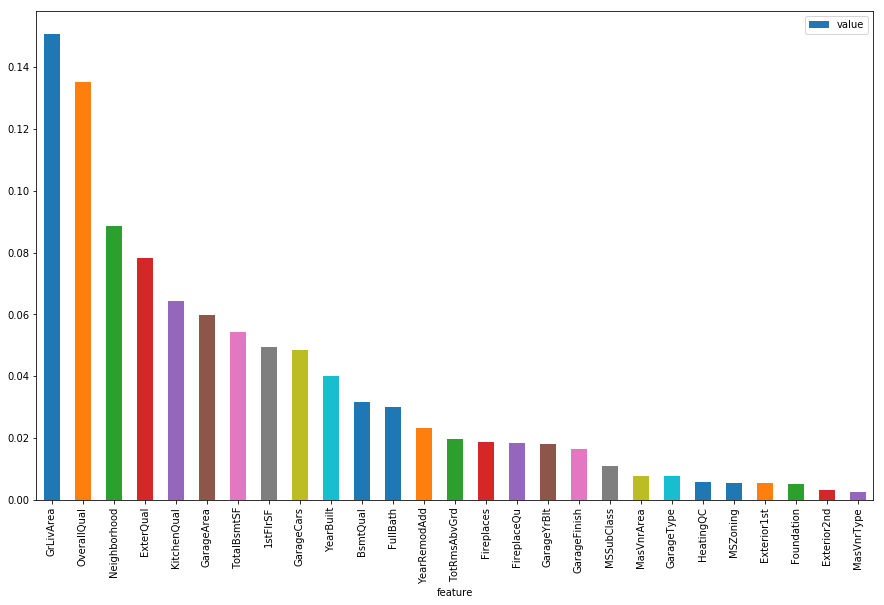

In [58]:
featureimp.plot(x = 'feature', y = 'value', kind = 'bar', figsize = (15, 9))

In [26]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
RMSE_train = np.sqrt(np.sum(np.square((y_train) - (y_pred_train)))/y_train.size)
RMSE_test = np.sqrt(np.sum(np.square((y_test) - (y_pred_test)))/y_test.size)
# RMSE_train = np.sqrt(np.sum(np.square(np.log(y_train) - np.log(y_pred_train)))/y_train.size)
# RMSE_test = np.sqrt(np.sum(np.square(np.log(y_test) - np.log(y_pred_test)))/y_test.size)
print('RMSE.log.diff(train):', round(RMSE_train, 3))
print('RMSE.log.diff(test):', round(RMSE_test, 3))

RMSE.log.diff(train): 0.064
RMSE.log.diff(test): 0.134


### Gradient Boosting

In [32]:
estimator = ensemble.GradientBoostingRegressor()

In [54]:
grid_para = [{"learning_rate": [0.005], "n_estimators": np.arange(1300,1500,100), "max_depth": [2, 3]}]

In [55]:
gridsearch = model_selection.GridSearchCV(estimator, param_grid = grid_para, cv = 5)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_
model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.005, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1400,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [53]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
RMSE_train = np.sqrt(np.sum(np.square((y_train) - (y_pred_train)))/y_train.size)
RMSE_test = np.sqrt(np.sum(np.square((y_test) - (y_pred_test)))/y_test.size)
# RMSE_train = np.sqrt(np.sum(np.square(np.log(y_train) - np.log(y_pred_train)))/y_train.size)
# RMSE_test = np.sqrt(np.sum(np.square(np.log(y_test) - np.log(y_pred_test)))/y_test.size)
print('RMSE.log.diff(train):', round(RMSE_train, 3))
print('RMSE.log.diff(test):', round(RMSE_test, 3))

RMSE.log.diff(train): 0.098
RMSE.log.diff(test): 0.135


### Support Vector Regression

In [27]:
from sklearn import svm

In [28]:
estimator = svm.SVR()
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [29]:
gamma = [0.0001, 0.00015]
e = [.1, 1, 10]
C = [8000, 9000, 10000]

grid_para = [{'kernel': ['rbf'], 'gamma': gamma, 'epsilon': e, 'C': C}]
gridsearch = model_selection.GridSearchCV(estimator, param_grid = grid_para, cv = 3)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_
model

SVR(C=9000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
RMSE_train = np.sqrt(np.sum(np.square((y_train) - (y_pred_train)))/y_train.size)
RMSE_test = np.sqrt(np.sum(np.square((y_test) - (y_pred_test)))/y_test.size)
# RMSE_train = np.sqrt(np.sum(np.square(np.log(y_train) - np.log(y_pred_train)))/y_train.size)
# RMSE_test = np.sqrt(np.sum(np.square(np.log(y_test) - np.log(y_pred_test)))/y_test.size)
print('RMSE.log.diff(train):', round(RMSE_train, 3))
print('RMSE.log.diff(test):', round(RMSE_test, 3))

RMSE.log.diff(train): 0.121
RMSE.log.diff(test): 0.132


In [31]:
gamma = [0.002]
e = [.1]
C = [7000, 8000, 9000]
degree = [1, 2]

grid_para = [{'kernel': ['poly'], 'degree': degree, 'gamma': gamma, 'epsilon': e, 'C': C}]
gridsearch = model_selection.GridSearchCV(estimator, param_grid = grid_para, cv = 3)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_
model

SVR(C=7000, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.002,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [32]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
RMSE_train = np.sqrt(np.sum(np.square((y_train) - (y_pred_train)))/y_train.size)
RMSE_test = np.sqrt(np.sum(np.square((y_test) - (y_pred_test)))/y_test.size)
# RMSE_train = np.sqrt(np.sum(np.square(np.log(y_train) - np.log(y_pred_train)))/y_train.size)
# RMSE_test = np.sqrt(np.sum(np.square(np.log(y_test) - np.log(y_pred_test)))/y_test.size)
print('RMSE.log.diff(train):', round(RMSE_train, 3))
print('RMSE.log.diff(test):', round(RMSE_test, 3))

RMSE.log.diff(train): 0.144
RMSE.log.diff(test): 0.168


In [33]:
gamma = [0.000005]
e = [.05, .1]
C = [7000, 8000, 9000]

grid_para = [{'kernel': ['sigmoid'], 'gamma': gamma, 'epsilon': e, 'C': C}]
gridsearch = model_selection.GridSearchCV(estimator, param_grid = grid_para, cv = 3)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_
model

SVR(C=7000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=5e-06,
  kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
RMSE_train = np.sqrt(np.sum(np.square((y_train) - (y_pred_train)))/y_train.size)
RMSE_test = np.sqrt(np.sum(np.square((y_test) - (y_pred_test)))/y_test.size)
# RMSE_train = np.sqrt(np.sum(np.square(np.log(y_train) - np.log(y_pred_train)))/y_train.size)
# RMSE_test = np.sqrt(np.sum(np.square(np.log(y_test) - np.log(y_pred_test)))/y_test.size)
print('RMSE.log.diff(train):', round(RMSE_train, 3))
print('RMSE.log.diff(test):', round(RMSE_test, 3))

RMSE.log.diff(train): 0.088
RMSE.log.diff(test): 0.137
